# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
! pip install citipy 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import random
from random import sample
import os
import csv
from pprint import pprint

# Import API key
import api_keys
from api_keys import api_key


# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
unique_cities = len(cities)
print(f"From 1500 sets of lats and lngs, there are {unique_cities} unique cities" )


From 1500 sets of lats and lngs, there are 604 unique cities


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Grab 500 random cities from unique cities list above
city_sample = sample(cities,500)
city_sample

['nishihara',
 'perth',
 'padang',
 'ketchikan',
 'serafimovich',
 'abu kamal',
 'maragogi',
 'vao',
 'oranjestad',
 'verkhnyaya inta',
 'vaini',
 'gumdag',
 'astoria',
 'labuhan',
 'saleaula',
 'juba',
 'villeneuve-sur-lot',
 'palembang',
 'sandwick',
 'sorland',
 'elmira',
 'marzuq',
 'burica',
 'jalalabad',
 'volot',
 'kodiak',
 'lorengau',
 'bredasdorp',
 'kilgore',
 'talawdi',
 'general roca',
 'port hawkesbury',
 'karkaralinsk',
 'arraial do cabo',
 'minuri',
 'ayios petros',
 'haines junction',
 'cabo san lucas',
 'sisimiut',
 'ostrovnoy',
 'walvis bay',
 'goundam',
 'mana',
 'gamba',
 'brovst',
 'parian dakula',
 'giyani',
 'green',
 'pathein',
 'edd',
 'acapulco',
 'chicaman',
 'comodoro rivadavia',
 'carnarvon',
 'umm lajj',
 'barentsburg',
 'wewak',
 'codrington',
 'filingue',
 'saint-philippe',
 'lima',
 'tessalit',
 'mugur-aksy',
 'nikolskoye',
 'qingquan',
 'narsaq',
 'tuktoyaktuk',
 'pisco',
 'guiglo',
 'novobirilyussy',
 'broken hill',
 'grand centre',
 'manuk mangkaw',

In [5]:
# Perform a weather check on each city using a series of successive API calls.
# Include a print log of each city as it's being processed (with the city number and city name).

city_name = []
country = []
city_lat = []
city_lngs = []
city_maxtemp = []
city_humidity = []
city_cloudiness = []
city_windspeed = []
date = []
unfoundcities = 0
units= 'imperial'

for city in city_sample:
    
    try:
        base_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID="
        final_url = f"{base_url}{api_key}&q={city}&units={units}"
        response = requests.get(final_url).json()
        
        city_name.append(response['name'])
        city_cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        city_humidity.append(response["main"]["humidity"])
        city_lat.append(response["coord"]["lat"])
        city_lngs.append(response["coord"]["lon"])
        city_maxtemp.append(response["main"]["temp_max"])
        city_windspeed.append(response["wind"]["speed"])

    except:
        unfoundcities += 1
        pass 

print(f"Unfound cities: {unfoundcities}")

Unfound cities: 41


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# Display the data frame
foundcities_df = pd.DataFrame({
                    "City": city_name,
                    "Cloudiness": city_cloudiness,
                    "Country": country,
                    "Date": date,
                    "Humidity": city_humidity,
                    "Lat": city_lat,
                    "Lon": city_lngs,
                    "Max Temp (F)": city_maxtemp,
                    "Wind Speed (MPH)": city_windspeed
    })

foundcities_df.head()


,City,Cloudiness,Country,Date,Humidity,Lat,Lon,Max Temp (F),Wind Speed (MPH)
0,Nishihara,20,JP,1604277315,73,26.18,127.76,77.00,8.05
1,Perth,75,AU,1604277062,77,-31.93,115.83,64.00,8.05
2,Padang,99,ID,1604277315,68,-0.95,100.35,81.37,1.83
3,Ketchikan,90,US,1604277157,100,55.34,-131.65,51.80,34.45
4,Serafimovich,100,RU,1604277185,77,49.58,42.74,44.01,6.62


In [7]:
# Export the dataframe to a csv file and skip the header row
foundcities_df.to_csv("Found Cities.csv", index=False)

print(f"There are {len(foundcities_df)} cities found out of 500 random cities generated.")

There are 459 cities found out of 500 random cities generated.


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

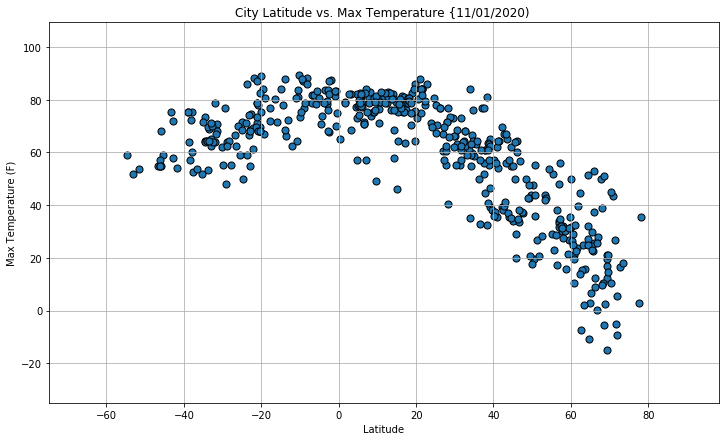

In [8]:
lat_x = foundcities_df['Lat']
temp_y = foundcities_df['Max Temp (F)']

foundcities_df.plot(kind="scatter", x="Lat", y="Max Temp (F)", grid=True, figsize=(12,7), facecolor="darkblue", edgecolor="black", s=50)
plt.title('City Latitude vs. Max Temperature {11/01/2020) ')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.xlim(min(lat_x) -20 ,max(lat_x) +20)
plt.ylim(min(temp_y) -20,max(temp_y) +20)

plt.show()

#### Latitude vs. Humidity Plot

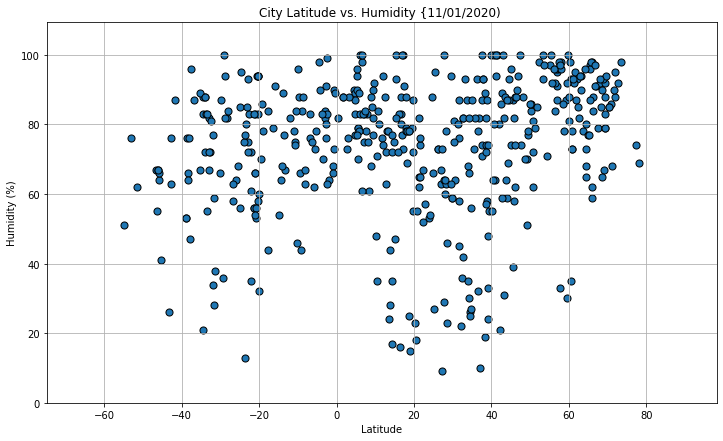

In [9]:
lat_x = foundcities_df['Lat']
humd_y = foundcities_df['Max Temp (F)']

foundcities_df.plot(kind="scatter", x="Lat", y="Humidity", grid=True, figsize=(12,7), facecolor="darkblue", edgecolor="black", s=50)
plt.title('City Latitude vs. Humidity {11/01/2020) ')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.xlim(min(lat_x) -20 ,max(lat_x) +20)
plt.ylim(0,max(humd_y) +20)

plt.show()

#### Latitude vs. Cloudiness Plot

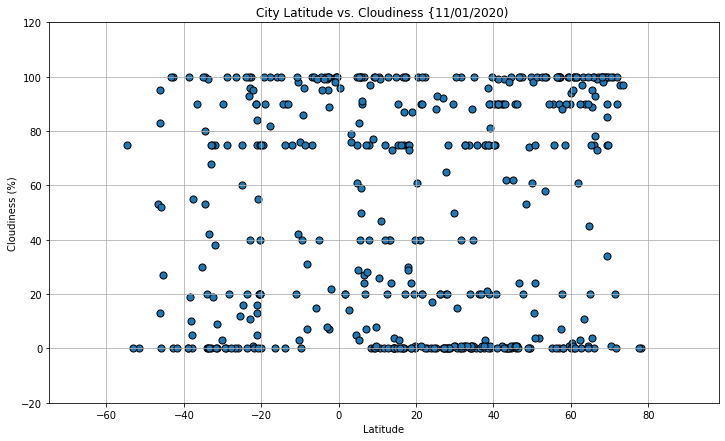

In [10]:
lat_x = foundcities_df['Lat']
cloud_y = foundcities_df['Cloudiness']

foundcities_df.plot(kind="scatter", x="Lat", y="Cloudiness", grid=True, figsize=(12,7), facecolor="darkblue", edgecolor="black", s=50)
plt.title('City Latitude vs. Cloudiness {11/01/2020) ')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.xlim(min(lat_x) -20 ,max(lat_x) +20)
plt.ylim(min(cloud_y) -20,max(cloud_y) +20)

plt.show()

#### Latitude vs. Wind Speed Plot

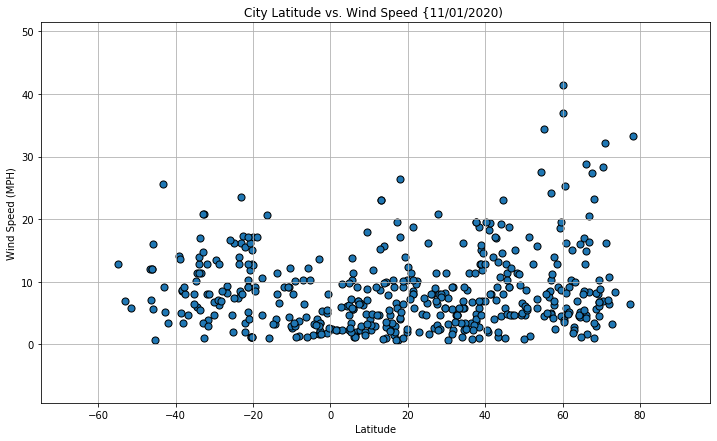

In [12]:
lat_x = foundcities_df['Lat']
wind_y = foundcities_df['Wind Speed (MPH)']

foundcities_df.plot(kind="scatter", x="Lat", y="Wind Speed (MPH)", grid=True, figsize=(12,7), facecolor="darkblue", edgecolor="black", s=50)
plt.title('City Latitude vs. Wind Speed {11/01/2020) ')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (MPH)')
plt.xlim(min(lat_x) -20 ,max(lat_x) +20)
plt.ylim(min(wind_y) -10,max(wind_y) +10)

plt.show()